In [1]:
%load_ext autoreload
%autoreload 2


import math
from sklearn.metrics import mean_squared_error
from dataset import get_dataset
from preprocessing import preprocessData


In [2]:
df_train, df_test = get_dataset()
target = 't0s0'

# Put the 0 when there is a missing value for lag columns
cols = ['t0s0', 't1s0', 't2s0', 't3s0', 't0s1', 't0s2', 't0s3']

for col in cols:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [ ]:
# Show the date range from 

# Benchmark - with the average

In [4]:
# Now lets use the average ocuppancy of the train dataset as the prediction

average_occupancy = df_train[target].mean()
predictions = [average_occupancy] * df_test.shape[0]

RMSE_average = math.sqrt(mean_squared_error(df_test[target], predictions))
print('RMSE average:', RMSE_average)

RMSE average: 0.15750056868988294


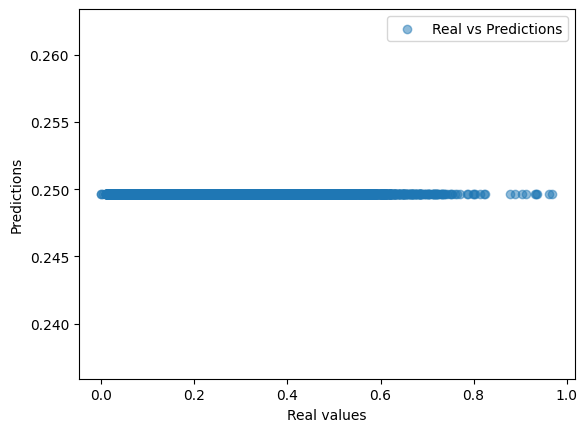

In [9]:
# plot the real values x predictions
import matplotlib.pyplot as plt

plt.scatter(df_test[target], predictions, label='Real vs Predictions', alpha=0.5)
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

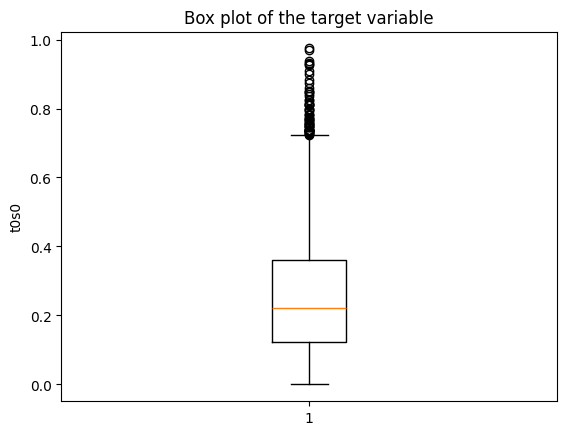

In [10]:
plt.boxplot(df_train[target])
plt.title('Box plot of the target variable')
plt.ylabel(target)
plt.show()

# Benchmark

In [4]:
from andrea_models import AndreaLinearRegression


# Creating a model with two features
cols = ['t1s0', 't0s1']
target = 't0s0'

bench_mark_model = AndreaLinearRegression()
bench_mark_model.fit(df_train[cols], df_train[target], column_names=cols)
bench_mark_model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 4.699e+04
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:29:40   Log-Likelihood:                 27575.
No. Observations:               21783   AIC:                        -5.514e+04
Df Residuals:                   21780   BIC:                        -5.512e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0536      0.001     66.515      0.0

In [5]:
# Test the benchmark model
predictions = bench_mark_model.predict(df_test[cols])

RMSE_2_features = math.sqrt(mean_squared_error(df_test[target], predictions))
print('RMSE benchmark:', RMSE_2_features)

RMSE benchmark: 0.06889595278716454
